In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [58]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [60]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [63]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
lastyear_prcp = (session
                        .query(Measurement.date, Measurement.prcp)
                        .filter(Measurement.date > last_year)
                        .order_by(Measurement.date)
                        .all())
lastyear_prcp_df = pd.DataFrame(lastyear_prcp, columns=["Date", "Precipitation"])
#lastyear_prcp_df.dtypes
lastyear_prcp_df["Date"] = pd.to_datetime(lastyear_prcp_df["Date"])
lastyear_prcp_df.sort_values(by=['Date'], inplace=True, ascending=False)
lastyear_prcp_df.set_index(lastyear_prcp_df["Date"], inplace = True)
lastyear_prcp_df.head()



,Date,Precipitation
Date,,
2017-08-23,2017-08-23,0.45
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-22,2017-08-22,0.50


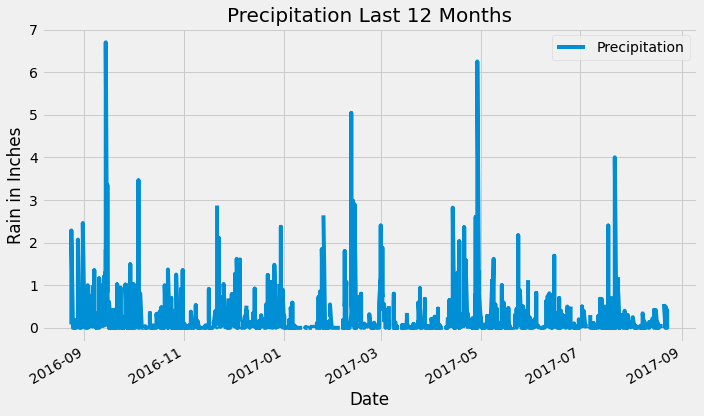

In [64]:
lastyear_prcp_df.plot('Date','Precipitation',figsize=(10,6))
plt.xlabel("Date")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Rain in Inches")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.savefig("Images/Precipitation.png")
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastyear_prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(func.count(Station.id)).all()
stations

[(9)]

In [26]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = (session
                        .query(Measurement.station, func.count(Measurement.id))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.id).desc())
                        .all())
    
print( f"The most Active Station is {most_active_station[0][0]} with {most_active_station[0][1]} weather observations.")
most_active_station

The most Active Station is USC00519281 with 2772 weather observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_records = (session
                        .query(func.min(Measurement.tobs),
                               func.max(Measurement.tobs),
                               func.avg(Measurement.tobs))
                        .filter(Measurement.station == most_active_station[0][0])
                        .all())    
    
station_records   

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_histogram = (session
                        .query(Measurement.date, Measurement.tobs)
                        .filter(Measurement.date > last_year, 
                                Measurement.station == most_active_station[0][0])
                        .all())  
station_histogram_df = pd.DataFrame(station_histogram, columns=["Date", "Tobs"])
station_histogram_df["Date"] = pd.to_datetime(station_histogram_df["Date"])
station_histogram_df.head()

,Date,Tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


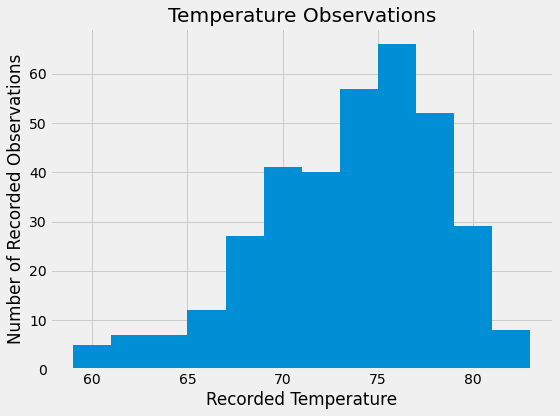

In [67]:
plt.figure(figsize=(8,6))
plt.hist(station_histogram_df["Tobs"],bins = 12)
plt.title("Temperature Observations")
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.tight_layout()
plt.savefig("Images/Temp_Station.png")
plt.show()

# Close session

In [54]:
# Close Session
session.close()